<a href="https://colab.research.google.com/github/anneleschallierdelisle/git-practice/blob/master/SharkProject_final_version_18h48.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import data and explore**


In [ ]:
import numpy as np
import pandas as pd
!pip install xlrd

url = "https://www.sharkattackfile.net/spreadsheets/GSAF5.xls"

df = pd.read_excel(url)
df

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7069,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
7070,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
7071,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
7072,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


In [ ]:
df.info() # info on missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7074 entries, 0 to 7073
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            7074 non-null   object 
 1   Year            7072 non-null   float64
 2   Type            7056 non-null   object 
 3   Country         7024 non-null   object 
 4   State           6587 non-null   object 
 5   Location        6507 non-null   object 
 6   Activity        6491 non-null   object 
 7   Name            6856 non-null   object 
 8   Sex             6496 non-null   object 
 9   Age             4080 non-null   object 
 10  Injury          7039 non-null   object 
 11  Fatal Y/N       6513 non-null   object 
 12  Time            3547 non-null   object 
 13  Species         3943 non-null   object 
 14  Source          7054 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   object 
 17  href            6796 non-null   o

In [ ]:
#Checking if there's duplicates
df.duplicated().sum()

np.int64(0)

## **Data Wrangling Part of the code**

In [ ]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

#Standardize countries
country_replacements = {
    "usa": "united states",
    "u.s.a.": "united states",
    "ceylon (sri lanka)": "sri lanka",
    "maldive islands": "maldives",
    "st. martin": "saint martin",
    "st martin": "saint martin",
}

non_countries = [
    "atlantic ocean",
    "pacific ocean",
    "indian ocean",
    "mediterranean sea",
    "red sea",
    "ocean",
    "asia?",
    "africa"
]

# Clean country column
df["country"] = df["country"].astype(str).str.strip().str.lower().replace(country_replacements)

# Filter out non-countries, make a copy to avoid SettingWithCopyWarning
df = df[~df["country"].isin(non_countries)].copy()

# Remove non-letter characters safely
df.loc[:, "country"] = df["country"].str.replace(r"[^a-z\s]", "", regex=True)

# Check unique cleaned country names
df["country"].unique()

array(['brazil', 'australia', 'united states', 'us virgin islands',
       'new caledonia', 'french polynesia', 'samoa', 'columbia',
       'costa rica', 'bahamas', 'puerto rico', 'spain', 'canary islands',
       'south africa', 'vanuatu', 'jamaica', 'israel', 'mexico',
       'maldives', 'philippines', 'turks and caicos', 'mozambique',
       'egypt', 'thailand', 'new zealand', 'hawaii', 'honduras',
       'indonesia', 'morocco', 'belize', 'tobago', 'india', 'trinidad',
       'coral sea', 'portugal', 'colombia', 'ecuador', 'cuba',
       'seychelles', 'argentina', 'fiji', 'england', 'japan',
       'british overseas territory', 'canada', 'jordan',
       'st kitts  nevis', 'saint martin', 'papua new guinea',
       'reunion island', 'china', 'ireland', 'italy', 'malaysia', 'libya',
       'nan', 'mauritius', 'solomon islands',
       'st helena british overseas territory', 'comoros', 'reunion',
       'united kingdom', 'united arab emirates', 'cape verde',
       'dominican republic

In [ ]:
df.columns

Index(['date', 'year', 'type', 'country', 'state', 'location', 'activity',
       'name', 'sex', 'age', 'injury', 'fatal_y/n', 'time', 'species',
       'source', 'pdf', 'href_formula', 'href', 'case_number', 'case_number.1',
       'original_order', 'unnamed:_21', 'unnamed:_22'],
      dtype='object')

In [ ]:
# Fatal column cleaned
fatal_replacements = {"Y x 2": "Y", " N": "N", "Nq":"N", "M": np.nan, "F": np.nan, "2017": np.nan, "UNKNOWN": np.nan}
df["fatal_clean"] = (df["fatal_y/n"].replace(fatal_replacements).str.strip().str.upper())
print(df["fatal_clean"].value_counts(dropna = False))

fatal_clean
N      4919
Y      1468
NaN     636
Name: count, dtype: int64


In [ ]:
# Add "Y" to Fatal_clean when Injury contains "Fatal" and Fatl Y/N is empty
df.loc[df['injury'].str.contains("FATAL|fatalities", case=False, regex=True) & df["fatal_y/n"].isna(), "fatal_clean"] = "Y"
print(df["fatal_clean"].value_counts(dropna = False))


fatal_clean
N      4919
Y      1522
NaN     582
Name: count, dtype: int64


In [ ]:
# Remove "?" values in the df
df = df.replace("?","")

In [ ]:
# Create a new column for activity and gather all activity inputs containing key words activity
df.loc[df['activity'].str.contains("Swimming", case=False, regex=True, na=False), "activity_clean"] = "Swimming"
df.loc[df['activity'].str.contains("Fishing", case=False, regex=True, na=False), "activity_clean"] = "Fishing"
df.loc[df['activity'].str.contains("Surfing", case=False, regex=True, na=False), "activity_clean"] = "Surfing"
df.loc[df['activity'].str.contains("Wading", case=False, regex=True, na=False), "activity_clean"] = "Wading"
df.loc[df['activity'].str.contains("Diving", case=False, regex=True, na=False), "activity_clean"] = "Diving"
print(df["activity_clean"].value_counts(dropna = False))

activity_clean
NaN         2380
Surfing     1313
Fishing     1247
Swimming    1243
Diving       633
Wading       207
Name: count, dtype: int64


In [ ]:
# Create a new column Gender_clean and clean data of Sex column
gender_replacements = {".": np.nan, "M x 2": "M", "M": "M", "N": np.nan, "F": "F", "lli": np.nan, "": np.nan}
df["gender_clean"] = (df["sex"].replace(gender_replacements).str.strip().str.upper())
print(df["gender_clean"].value_counts(dropna = False))

gender_clean
M      5642
F       807
NaN     574
Name: count, dtype: int64


In [ ]:
# Clean incident types
df["type"] = df["type"].str.strip().str.capitalize()

In [ ]:
# Create a clean column for identfiable incidents based on main shark attacks page typology
df.loc[df['type'].str.contains("Provoked|Watercraft|Questionable|Sea disaster", case=False, regex=True, na=False), "type_clean"] = df["type"]
print(df["type_clean"].value_counts(dropna =  False))

type_clean
Unprovoked      5208
Provoked         639
NaN              576
Watercraft       351
Sea disaster     223
Questionable      26
Name: count, dtype: int64


## **Analysis Part of the code**

In [ ]:
#Attacks only in the us
usa_df = df[df["country"] == "united states"]

fatal_counts = usa_df["fatal_clean"].value_counts(dropna=False)
print(fatal_counts)

fatal_percent = usa_df["fatal_clean"].value_counts(normalize=True) * 100
print(fatal_percent)

fatal_clean
N      2168
Y       213
NaN     198
Name: count, dtype: int64
fatal_clean
N    91.054179
Y     8.945821
Name: proportion, dtype: float64


In [ ]:
#Attacks only in australia
aus_df = df[df["country"] == "australia"]

aus_fatal_counts = aus_df["fatal_clean"].value_counts(dropna=False)
print(aus_fatal_counts)

aus_fatal_percent = aus_df["fatal_clean"].value_counts(normalize=True) * 100
print(aus_fatal_percent)


fatal_clean
N      1070
Y       323
NaN     130
Name: count, dtype: int64
fatal_clean
N    76.812635
Y    23.187365
Name: proportion, dtype: float64


In [ ]:
 # Top 10 countries
attacks_per_country = df['country'].value_counts()
attacks_per_country.head(10)

,count
country,
united states,2579
australia,1523
south africa,599
new zealand,146
bahamas,141
papua new guinea,136
brazil,123
mexico,107
italy,72


In [ ]:
# Number of fatal attacks and non-fatal attacks
df['fatal_numeric'] = df['fatal_clean'].map({'Y': 1, 'N': 0, 'UNKNOWN': np.nan})

df['fatal_numeric'].value_counts(dropna=False)

,count
fatal_numeric,
0.0,4919
1.0,1522
NaN,582


In [ ]:
top_countries = df['country'].value_counts().head(10).index

# Example: group by country and calculate fatality rate
fatality_rate = df.groupby('country')['fatal_numeric'].mean() * 100

# Keep only countries with known fatality
fatality_rate = fatality_rate.dropna()

# Select only the countries in the top 10 list
fatality_top10 = round(fatality_rate.loc[top_countries],0)
fatality_top10

fatality_top10 = fatality_top10.dropna()
fatality_top10

attacks_per_country = df['country'].value_counts()

# Filter top 10 countries
attacks_top10 = attacks_per_country.loc[top_countries]

# Combine into a DataFrame
summary_top10 = pd.DataFrame({
    'attacks': attacks_top10,
    'fatality_rate_%': fatality_top10
})

summary_top10

,attacks,fatality_rate_%
country,,
united states,2579,9.0
australia,1523,23.0
south africa,599,22.0
new zealand,146,20.0
bahamas,141,11.0
papua new guinea,136,44.0
brazil,123,36.0
mexico,107,53.0
italy,72,27.0


In [ ]:
df[['country', 'fatal_clean']].describe(include='all')

,country,fatal_clean
count,7023,6441
unique,200,2
top,united states,N
freq,2579,4919


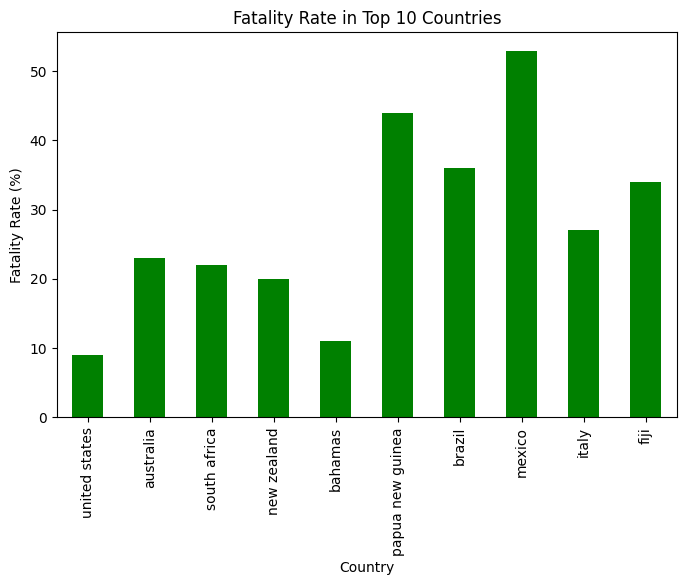

In [ ]:
import matplotlib.pyplot as plt

# Group by country and calculate fatality rate
fatality_rate = df.groupby('country')['fatal_numeric'].mean() * 100

# Keep only countries with known fatality
fatality_rate = fatality_rate.dropna()



fatality_top10.plot(kind='bar', color='green', figsize=(8,5), title='Fatality Rate in Top 10 Countries')
plt.ylabel('Fatality Rate (%)')
plt.xlabel('Country')
plt.show()

In [ ]:
columns_to_keep = ['country', 'fatal_clean', 'injury']
display(df[columns_to_keep].head(5))

,country,fatal_clean,injury
0,brazil,Y,Right thigh and lower leg stripped of flesh
1,australia,N,No injury shark knocked man of his board
2,australia,N,Puncture wounds to right knee
3,australia,N,Minor cuts and abrasions
4,australia,N,None reported damage to board


Conclusion:
The analysis of shark attacks across the top 10 countries shows that the United States has the highest number or recorded attacks, with 2579 incidents,
far exceeding the other countries in the dataset. Despite this high frequency, the fatality rate in the US is the lowest among the top 10 countries at 8.48%,
indicating that the majority of attacks are non-fatal. In contrast, countries like Papua New Guinea (43,94%), Mexico(52,08%), and Brazil(35,71%)
have significantly higher fatality rates despite having far fewer attacks. These results support the hypothesis that the United States covers the majority of shark attacks
with the lowest fatality rate. This pattern may reflect factors such as faster emergency response, better medical care, and more effective safety measures in US coastal areas.